In [1]:
from services import ParserService, SimulationService
from schemas import AdviserConfig

c:\Users\olive\Documents\AdviceTools\AdviceTools\venv\Lib\site-packages\pydantic\_internal\_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'validate_default' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'validate_default' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
c:\Users\olive\Documents\AdviceTools\AdviceTools\venv\Lib\site-packages\pydantic\_internal\_config.py:383: UserWarning: Valid config keys have changed in V2:
* 'allow_population_by_field_name' has been renamed to 'validate_by_name'
* 'validate_all' has been renamed to 'validate_default'
  warnings.warn(message, UserWarning)


In [ ]:
adviser_config = AdviserConfig(
    risk_allocation_map={1: 0.3, 2: 0.5, 3: 0.6, 4: 0.8, 5: 0.9},
    inflation=0.02,
    asset_costs={"stocks": 0.001, "bonds": 0.001, "cash": 0.001},
    expected_returns={"stocks": 0.08, "bonds": 0.04, "cash": 0.02},
    number_of_simulations=1000
)


In [3]:
parser = ParserService(user_id=1, filepath='financial_adviser_client_conversation.txt')
profile, cash_flows = parser.extract_data()

Extracting files: 100%|██████████| 1/1 [00:04<00:00,  4.81s/it]


In [ ]:
simulator = SimulationService(profile, cash_flows, adviser_config)
result = simulator.simulate()

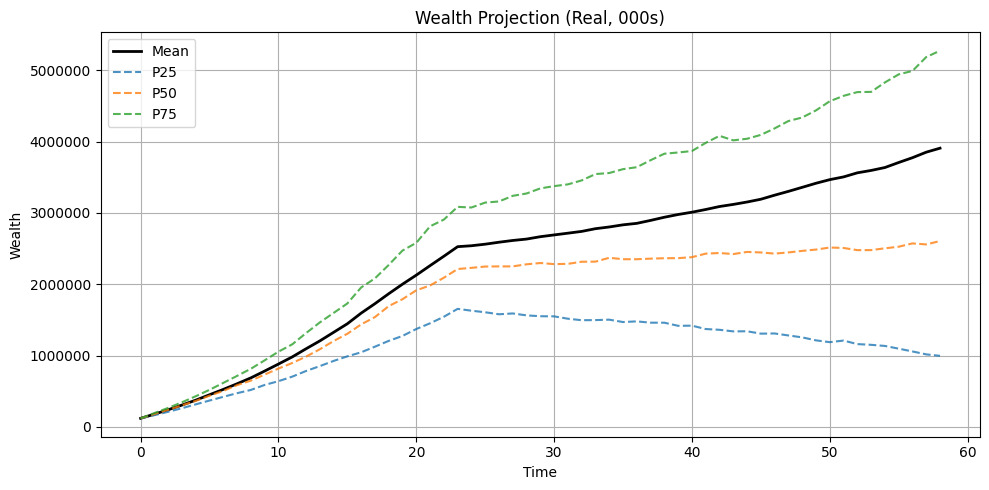

In [ ]:
import matplotlib.pyplot as plt

def plot_simulation_series(result, use_real=True, percentiles=(5, 25, 50, 75, 95)):
    data = result.real if use_real else result.nominal
    x = result.timesteps
    plt.figure(figsize=(10, 5))

    plt.plot(x, data.mean, label="Mean", color="black", linewidth=2)

    for p in percentiles:
        y = data.percentiles.get(p) or data.percentiles.get(float(p))
        if y:
            plt.plot(x, y, label=f"P{int(p)}", linestyle="--", alpha=0.8)
    
    plt.ticklabel_format(axis='y', style='plain', useOffset=False)
    plt.xlabel("Time")
    plt.ylabel("Wealth")
    plt.title(f"Wealth Projection ({'Real, 000s' if use_real else 'Nominal, 000s'})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_simulation_series(result)